# Data Understanding and Visualizations.

In [9]:
import zipfile

# Unzipping the file
zip_path = "/content/FruitinAmazon (1).zip"
extract_path = "/content/FruitinAmazon/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    print(f"Extracted files to {extract_path}")

Extracted files to /content/FruitinAmazon/


In [10]:
import os
# Define dataset path
train_dir = "/content/FruitinAmazon/FruitinAmazon/train"
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_dir))
if not class_names:
  print("No class directories found in the train folder!")
else:
  print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [11]:
from PIL import Image, UnidentifiedImageError
corrupted_images = [] # List to store corrupted images path
# Loop through each class folder and check for corrupted images
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path): # Ensure it’s a valid directory
    images = os.listdir(class_path)
    for img_name in images:
      img_path = os.path.join(class_path, img_name)
      try:
        with Image.open(img_path) as img:
          img.verify() # Verify image integrity
      except (IOError, UnidentifiedImageError):
          corrupted_images.append(img_path)

# Print results
if corrupted_images:
  print("\nCorrupted Images Found:")
  for img in corrupted_images:
    print(img)
else:
  print("\nNo corrupted images found.")


No corrupted images found.


Sample Code for Checking Class Imbalance.

In [12]:
import os

# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)



Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


Select Random Images for Visualization: Visualizing

In [13]:
import os
import random

selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)


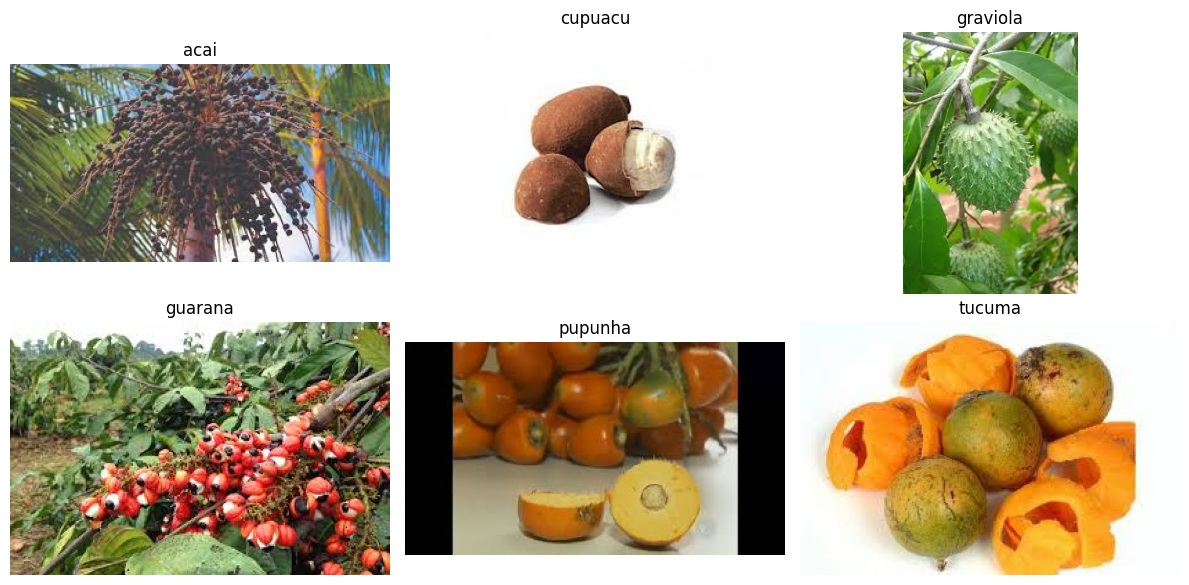

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Flatten axes array to handle cases where num_classes < rows * cols
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide empty subplots

plt.tight_layout()
plt.show()


- Data Integrity: Detecting and removing corrupted images prevents unexpected errors training.
- Balanced Dataset: Checking class distribution helps avoid bais toward dominant classes.
- Correct Labeling: Visualizing random images ensures that the dataset is structured correctly.




In [15]:
import tensorflow as tf
from tensorflow import keras

image_size = (28, 28)
batch_size = 32

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)


Found 90 files belonging to 6 classes.
Using 72 files for training.
Using 18 files for validation.


In [16]:
for images, labels in train_ds.take(1): # Take one batch
  print("Images shape:", images.shape)
  print("Labels shape:", labels.shape)

Images shape: (32, 28, 28, 3)
Labels shape: (32,)


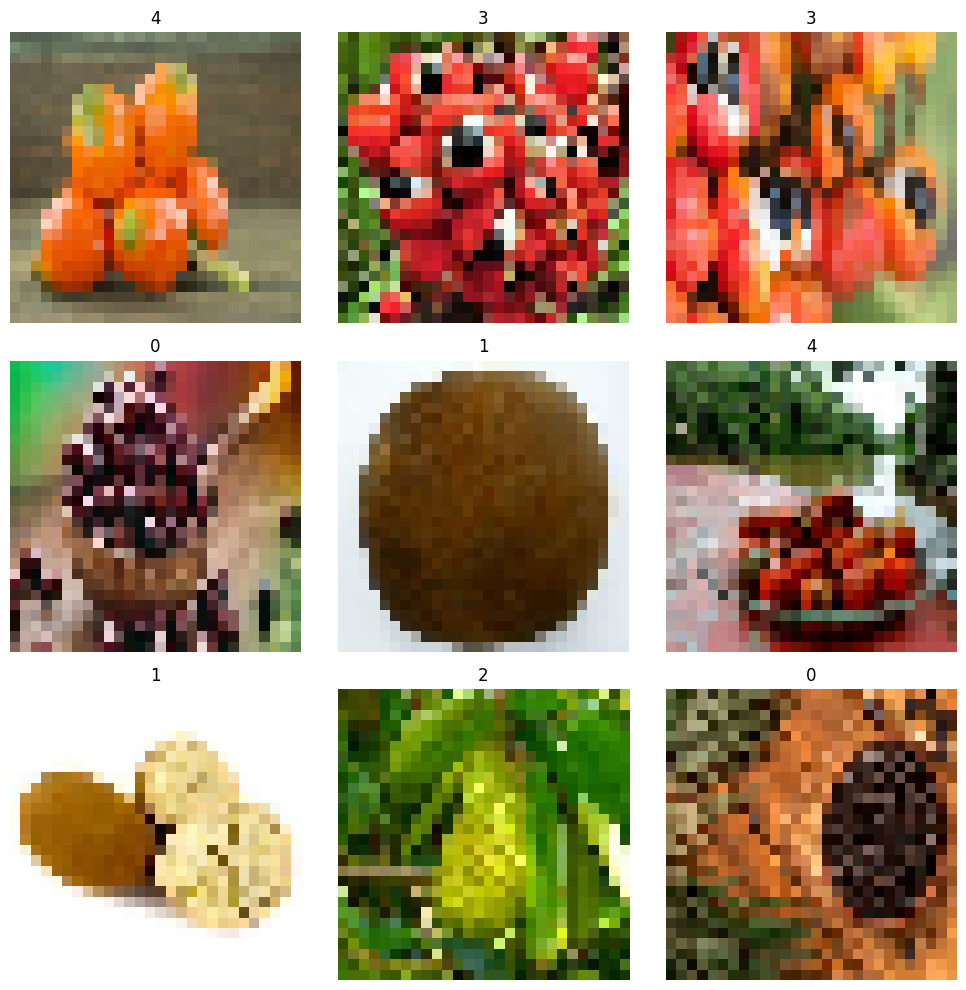

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

# Takes one batch of images from the dataset (train_ds)
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")  # Hide axis for better visualization

plt.tight_layout()
plt.show()


Idea behind Data Augmentation:

Data Augmentation with Keras:

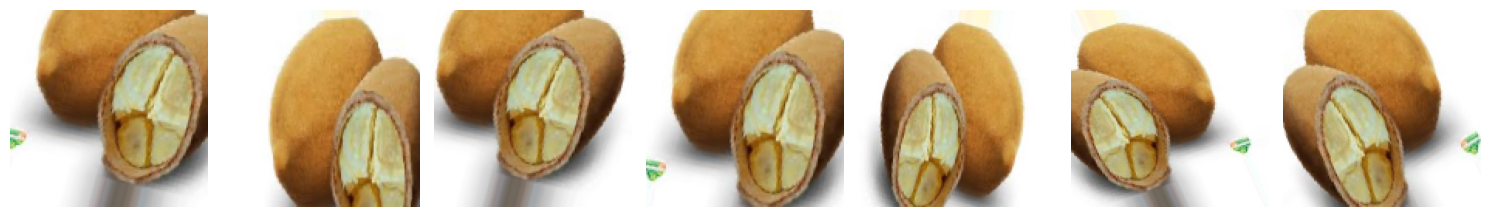

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Define Image Data Generator for Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load an example image
img = load_img('/content/FruitinAmazon/FruitinAmazon/train/cupuacu/download (1).jpeg', target_size=(128, 128))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Generate augmented images
aug_iter = datagen.flow(x, batch_size=1)

# Visualize 7 augmented images
fig, ax = plt.subplots(1, 7, figsize=(15, 5))
for i in range(7):
    batch = next(aug_iter)
    ax[i].imshow(batch[0].astype('uint8'))  # Corrected quotes
    ax[i].axis('off')  # Hide axis

plt.tight_layout()
plt.show()


Using Keras tf.keras.layers.Random* (New API):

In [19]:
from tensorflow.keras import layers

# This is a sample implementation, using only two augmentations.
# You can add more based on your project requirements.
# Refer to Keras documentation for additional augmentation techniques.

data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images  # Ensure the augmented images are returned


DataAugemntation Layer directly in Model.

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    *data_augmentation_layers,
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])


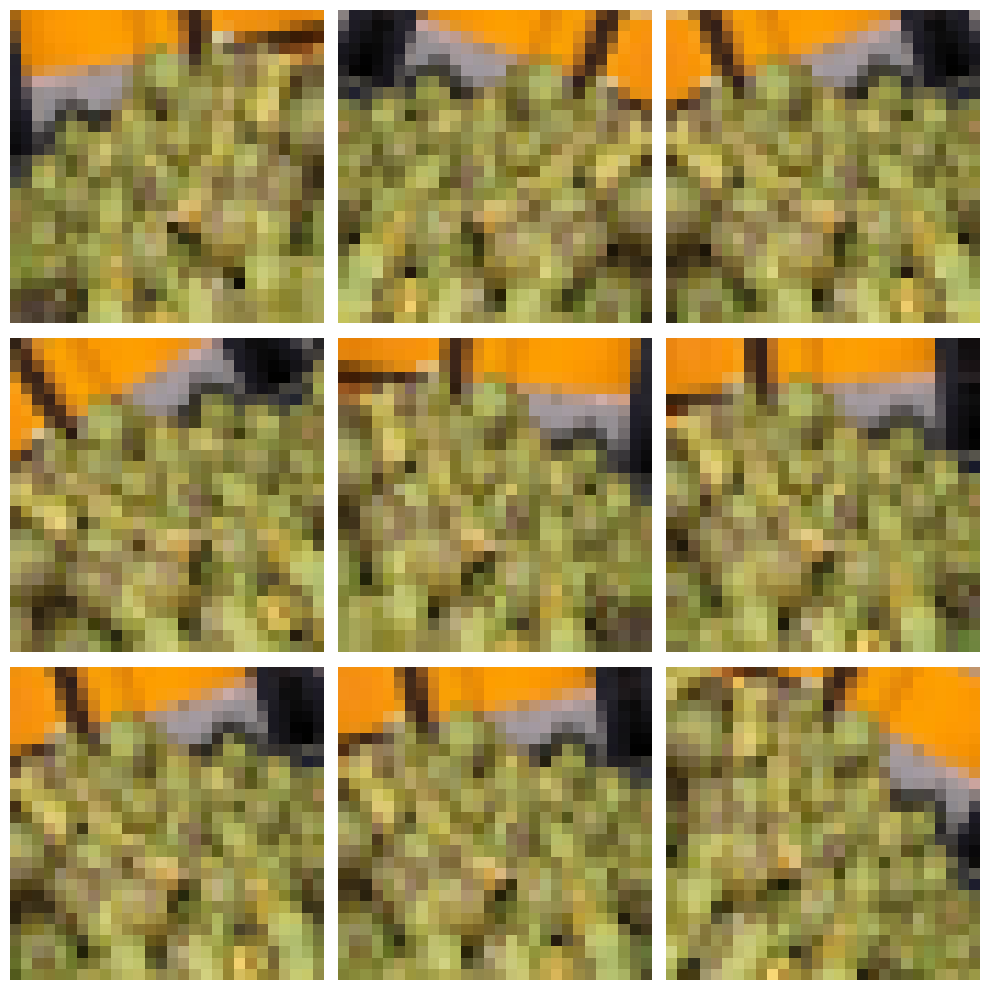

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

# Take one batch of images from the training dataset
for images, _ in train_ds.take(1):
    for i in range(9):
        # Apply data augmentation
        augmented_images = data_augmentation(images)

        # Plot the first augmented image in the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

plt.tight_layout()
plt.show()

Data Pre - processing: Scaling the data with Keras:

In [22]:
# Apply data augmentation directly to the training dataset
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x), y)  # Remove `training=True`
)

In [23]:
# Define the input shape
input_shape = (128, 128, 3)  # Example input shape for 128x128 RGB images

# Define the model input and preprocessing pipeline
inputs = keras.Input(shape=input_shape)  # Using the defined input_shape
x = data_augmentation(inputs)  # Apply augmentation as a layer
x = layers.Rescaling(1./255)(x)  # Normalize pixel values to [0, 1]

Batch Normalization Layer

In [25]:
from tensorflow.keras.layers import BatchNormalization
layer = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer="zeros", gamma_initializer="ones")

In [27]:
from tensorflow.keras.layers import Dropout

# Define the dropout rate
rate = 0.5  # This means 50% of the input units will be dropped during training

# Create the Dropout layer
dropout_layer = Dropout(rate)


In [28]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [29]:
# Freeze the layers of the base model
for layer in base_model.layers:
  layer.trainable = False

In [30]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces dimensions (height, width) to a single vector per image
x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 neurons
x = Dense(10, activation='softmax')(x)  # Output layer for 10 classes (with softmax for multi-class classification)


In [31]:
from tensorflow.keras.models import Model
# Create the final model
model = Model(inputs=base_model.input, outputs=x)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with sparse_categorical_crossentropy
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model again
model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2322 - loss: 169.3562 - val_accuracy: 0.2222 - val_loss: 604.4150
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1289 - loss: 647.6484 - val_accuracy: 0.2222 - val_loss: 223.0784
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2648 - loss: 220.3277 - val_accuracy: 0.1667 - val_loss: 162.0904
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3585 - loss: 110.8674 - val_accuracy: 0.0556 - val_loss: 76.1805
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4271 - loss: 35.6943 - val_accuracy: 0.2222 - val_loss: 70.8427
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4431 - loss: 39.2724 - val_accuracy: 0.5000 - val_loss: 30.0210
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7244 - loss: 9.5361 - val_accuracy: 0.4444 - val_loss: 21.4979
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8073 - loss: 5.3841 - val_accuracy: 0.2778 -

Task - 2:

In [33]:
# Load VGG16 model pre-trained on ImageNet, without the fully connected layers (top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the pre-trained model
base_model.trainable = False

In [34]:
# Build the custom model on top of the VGG16 base
model = Sequential([
    base_model,  # Add the VGG16 base model
    Flatten(),  # Flatten the output from the base model
    Dense(128, activation='relu'),  # Add a fully connected layer with 128 units
    Dense(10, activation='softmax')  # Output layer with 10 units (assuming 10 fruit classes)
])

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training and validation datasets
train_ds = train_datagen.flow_from_directory(
    '/content/FruitinAmazon/FruitinAmazon/train',
    target_size=(224, 224),  # Resize images to 224x224 (input size for VGG16)
    batch_size=32,
    class_mode='sparse'  # For sparse categorical labels
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_ds = val_datagen.flow_from_directory(
    '/content/FruitinAmazon/FruitinAmazon/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [36]:
# Train the model
model.fit(train_ds, epochs=10, validation_data=val_ds)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.1342 - loss: 2.8055 - val_accuracy: 0.2667 - val_loss: 4.4694
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 589ms/step - accuracy: 0.2413 - loss: 4.0626 - val_accuracy: 0.4000 - val_loss: 3.7076
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 524ms/step - accuracy: 0.5691 - loss: 2.2787 - val_accuracy: 0.4667 - val_loss: 1.8303
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 578ms/step - accuracy: 0.5056 - loss: 1.5825 - val_accuracy: 0.3000 - val_loss: 2.8262
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 578ms/step - accuracy: 0.5819 - loss: 1.0737 - val_accuracy: 0.5000 - val_loss: 2.9121
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 0.6559 - loss: 0.8931 - val_accuracy: 0.5333 - val_loss: 1.9526
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step - accuracy: 0.7408 - loss: 0.9894 - val_accuracy: 0.5333 - val_loss: 1.9926
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.8575 - loss: 0.4856 - val_accuracy: 0.6333 - val_loss: 

In [37]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.6000 - loss: 2.0557
Validation Loss: 2.0557405948638916
Validation Accuracy: 0.6000000238418579


In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Get predictions for the validation dataset
predictions = model.predict(val_ds, verbose=1)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels from the validation dataset
true_classes = val_ds.classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


In [42]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=val_ds.class_indices.keys())
print(report)


              precision    recall  f1-score   support

        acai       0.20      0.20      0.20         5
     cupuacu       0.14      0.20      0.17         5
    graviola       0.00      0.00      0.00         5
     guarana       0.00      0.00      0.00         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.12      0.20      0.15         5

    accuracy                           0.10        30
   macro avg       0.08      0.10      0.09        30
weighted avg       0.08      0.10      0.09        30



In [43]:
model.save('fruit_classifier_model.h5')
